In [22]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
!pip install konlpy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [125]:
import matplotlib.pyplot as plt

# 한글 깨짐 방지
plt.rcParams['font.family'] = "Malgun Gothic"

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
from collections import Counter

In [43]:
import pandas as pd

# CSV 파일 경로 수정
csv_file_path = r'C:\Users\user\Desktop\프로젝트 기획서\1. eda code\근로_본문(vs).csv'

# CSV 파일 불러오기
df = pd.read_csv(csv_file_path)

# 불러온 데이터 확인
print(df.head())

   판례정보일련번호                         사건번호  선고 판결유형  \
0    241233  2024다211908, 211915, 211922  선고   판결   
1    241219                  2020다287921  선고   판결   
2    241051                  2021다274069  선고   판결   
3    240953                    2024도4055  선고   판결   
4    240951                   2020도16541  선고   판결   

                                                판시사항  \
0   [1] 파견근로자 보호 등에 관한 법률에 따라 직접고용의무가 발생하였으나 사용사업...   
1   구 파견근로자 보호 등에 관한 법률(2006. 12. 21. 법률 제8076호로 ...   
2   [1] 원고용주가 어느 근로자로 하여금 제3자를 위한 업무를 수행하도록 하는 경우...   
3   [1] 구 건설산업기본법(2018. 12. 31. 법률 제16136호로 개정되기 ...   
4    근로기준법은 사용자가 근로계약을 체결할 때 근로자에게 임금(임금의 구성항목·계산...   

                                                판결요지  \
0   [1] 파견근로자 보호 등에 관한 법률 제6조의2 제1항, 민법 제390조, 제3...   
1  구 파견근로자 보호 등에 관한 법률(2006. 12. 21. 법률 제8076호로 개...   
2   [1] 파견근로자 보호 등에 관한 법률 제2조 제1호 / [2] 파견근로자 보호 ...   
3   [1] 구 건설산업기본법(2018. 12. 31. 법률 제16136호로 개정되기 ...   
4  근로기준법 제1조, 제2조 제1항 제1호, 제17조, 제114조 제1호, 기간제 및...   

       

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   판례정보일련번호  360 non-null    int64 
 1   사건번호      360 non-null    object
 2   선고        360 non-null    object
 3   판결유형      360 non-null    object
 4   판시사항      165 non-null    object
 5   판결요지      253 non-null    object
 6   참조조문      192 non-null    object
 7   참조판례      359 non-null    object
 8   판례내용      1 non-null      object
dtypes: int64(1), object(8)
memory usage: 25.4+ KB


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# 각 컬럼의 결측값 확인
print(df.isnull().sum())

# 결측값 비율 확인
print(df.isnull().mean())

판례정보일련번호      0
사건번호          0
선고            0
판결유형          0
판시사항        195
판결요지        107
참조조문        168
참조판례          1
판례내용        359
dtype: int64
판례정보일련번호    0.000000
사건번호        0.000000
선고          0.000000
판결유형        0.000000
판시사항        0.541667
판결요지        0.297222
참조조문        0.466667
참조판례        0.002778
판례내용        0.997222
dtype: float64


길이분포

Text(0, 0.5, '빈도 수')

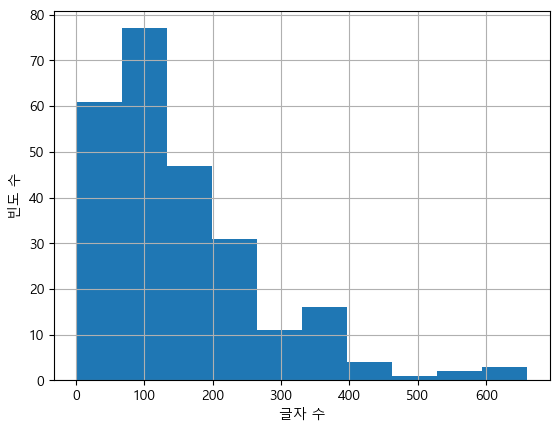

In [47]:
ax = df['판결요지'].str.len().hist()

ax.set_xlabel('글자 수')
ax.set_ylabel('빈도 수')

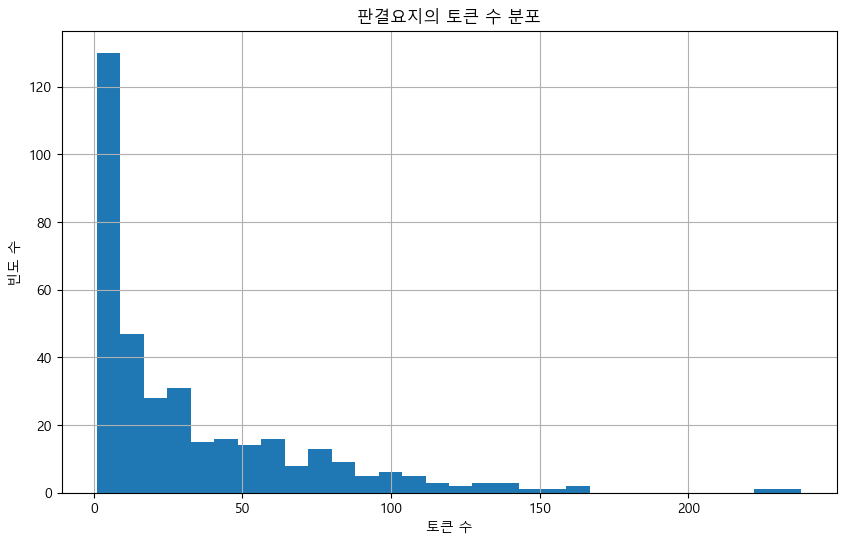

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# 결측값을 빈 문자열로 채움
df['판결요지'] = df['판결요지'].fillna('')

# 문자열을 공백으로 분할하고, 각 리스트의 길이를 계산
token_counts = df['판결요지'].str.split(' ').map(len)

# 히스토그램 그리기
ax = token_counts.hist(bins=30, figsize=(10,6))
ax.set_xlabel('토큰 수')
ax.set_ylabel('빈도 수')
ax.set_title('판결요지의 토큰 수 분포')
plt.show()


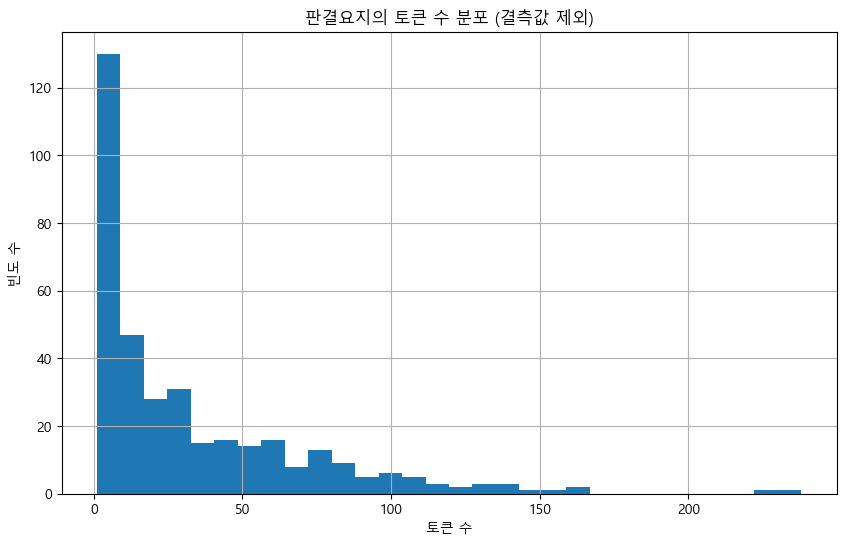

In [33]:
# 결측값을 제외하고 문자열 분할 및 토큰 수 계산
token_counts = df['판결요지'].dropna().str.split(' ').map(len)

# 히스토그램 그리기
ax = token_counts.hist(bins=30, figsize=(10,6))
ax.set_xlabel('토큰 수')
ax.set_ylabel('빈도 수')
ax.set_title('판결요지의 토큰 수 분포 (결측값 제외)')
plt.show()


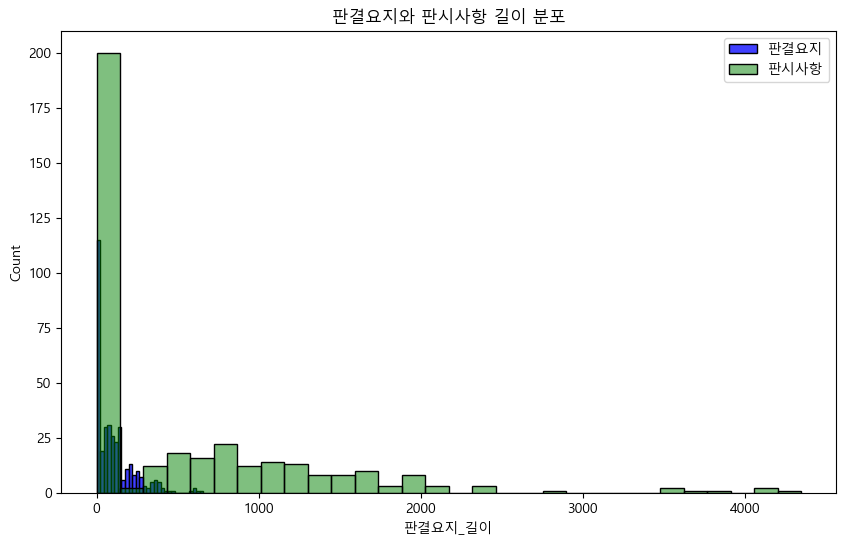

In [49]:
# 텍스트 데이터의 길이(문자 수) 분석
df['판결요지_길이'] = df['판결요지'].fillna('').apply(len)
df['판시사항_길이'] = df['판시사항'].fillna('').apply(len)

# 길이 분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['판결요지_길이'], bins=30, color='blue', label='판결요지')
sns.histplot(df['판시사항_길이'], bins=30, color='green', label='판시사항', alpha=0.5)
plt.title('판결요지와 판시사항 길이 분포')
plt.legend()
plt.show()


토큰 수 분포

In [35]:
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [37]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
!pip install konlpy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
!pip install JPype1


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from collections import Counter
from konlpy.tag import Okt

# 텍스트 데이터에서 명사 추출
okt = Okt()

def extract_nouns(text):
    nouns = okt.nouns(text)
    # 1자 단어 제외
    return ' '.join([noun for noun in nouns if len(noun) > 1])

# 결측값 처리 후 명사 추출
df['판결요지_명사'] = df['판결요지'].fillna('').apply(extract_nouns)

# 빈도 분석
word_counter = Counter(' '.join(df['판결요지_명사']).split())


# 상위 10개 단어 출력
print(word_counter.most_common(100))



[('법률', 355), ('근로기준법', 264), ('개정', 208), ('전의', 208), ('호로', 207), ('근로자', 156), ('현행', 137), ('참조', 122), ('보호', 114), ('파견', 94), ('시행', 68), ('형법', 66), ('민법', 54), ('형사소송법', 40), ('노동', 36), ('보장', 36), ('노동조합', 36), ('관계', 36), ('정법', 34), ('세법', 34), ('전문', 34), ('산업', 29), ('퇴직', 29), ('급여', 29), ('고용', 26), ('법인', 25), ('대통령령', 23), ('보험', 22), ('기간', 18), ('단시간', 18), ('민사소송법', 17), ('전부', 17), ('부칙', 16), ('재해', 15), ('보상', 15), ('자동차', 13), ('기본', 12), ('헌법', 12), ('규칙', 12), ('특정', 12), ('처벌', 12), ('촉진', 11), ('가중', 11), ('안전', 10), ('보건', 10), ('최저임금법', 10), ('경제범죄', 9), ('건설', 7), ('사업', 7), ('연령', 7), ('차별', 7), ('금지', 7), ('고령자', 7), ('채무자', 7), ('회생', 7), ('파산', 7), ('복지', 7), ('손해배상', 7), ('지원', 6), ('삭제', 6), ('상법', 6), ('자본시장', 6), ('금융투자', 6), ('소득', 6), ('관리', 6), ('소의', 5), ('여객', 5), ('운수', 5), ('가정', 5), ('별표', 5), ('폐지', 5), ('마약', 5), ('사용자', 5), ('남녀', 4), ('평등', 4), ('양립', 4), ('소송', 4), ('특례법', 4), ('행정소송법', 4), ('징수', 4), ('근로', 4), ('직업', 4), ('능력', 4

In [72]:
word_counter.most_common(100)

[('법률', 355),
 ('근로기준법', 264),
 ('개정', 208),
 ('전의', 208),
 ('호로', 207),
 ('근로자', 156),
 ('현행', 137),
 ('참조', 122),
 ('보호', 114),
 ('파견', 94),
 ('시행', 68),
 ('형법', 66),
 ('민법', 54),
 ('형사소송법', 40),
 ('노동', 36),
 ('보장', 36),
 ('노동조합', 36),
 ('관계', 36),
 ('정법', 34),
 ('세법', 34),
 ('전문', 34),
 ('산업', 29),
 ('퇴직', 29),
 ('급여', 29),
 ('고용', 26),
 ('법인', 25),
 ('대통령령', 23),
 ('보험', 22),
 ('기간', 18),
 ('단시간', 18),
 ('민사소송법', 17),
 ('전부', 17),
 ('부칙', 16),
 ('재해', 15),
 ('보상', 15),
 ('자동차', 13),
 ('기본', 12),
 ('헌법', 12),
 ('규칙', 12),
 ('특정', 12),
 ('처벌', 12),
 ('촉진', 11),
 ('가중', 11),
 ('안전', 10),
 ('보건', 10),
 ('최저임금법', 10),
 ('경제범죄', 9),
 ('건설', 7),
 ('사업', 7),
 ('연령', 7),
 ('차별', 7),
 ('금지', 7),
 ('고령자', 7),
 ('채무자', 7),
 ('회생', 7),
 ('파산', 7),
 ('복지', 7),
 ('손해배상', 7),
 ('지원', 6),
 ('삭제', 6),
 ('상법', 6),
 ('자본시장', 6),
 ('금융투자', 6),
 ('소득', 6),
 ('관리', 6),
 ('소의', 5),
 ('여객', 5),
 ('운수', 5),
 ('가정', 5),
 ('별표', 5),
 ('폐지', 5),
 ('마약', 5),
 ('사용자', 5),
 ('남녀', 4),
 ('평등', 4),
 ('양립', 4),
 ('

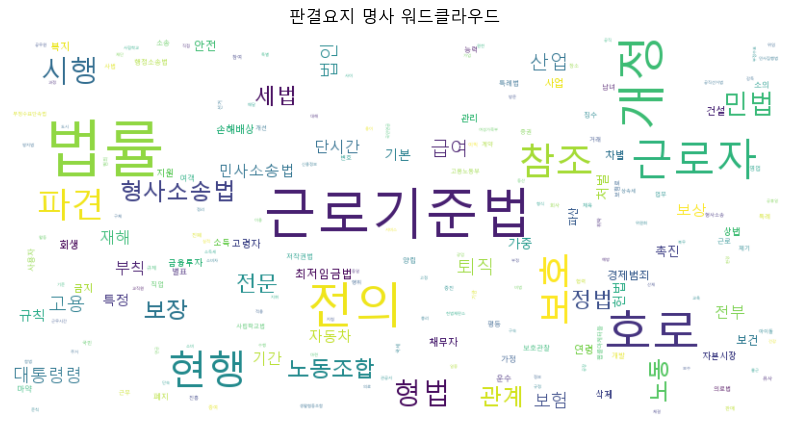

In [86]:
# 워드클라우드 생성
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로
                      width=800,
                      height=400,
                      background_color='white').generate_from_frequencies(word_counter)

# 워드클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.title('판결요지 명사 워드클라우드')
plt.show()

In [76]:
! pip install WordCloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ------- ------------------------------- 61.4/301.4 kB 812.7 kB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
! pip install wordcloud matplotlib pandas konlpy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 원형 마스크 이미지 로드
mask = np.array(Image.open('path/to/your/circle_mask.png'))  # 여기에 원형 이미지 경로를 입력하세요.

# 워드클라우드 생성
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로
                      mask=mask,  # 원형 마스크 설정
                      contour_color='black',  # 원 테두리 색상
                      contour_width=1,  # 원 테두리 두께
                      width=800,
                      height=400,
                      background_color='white').generate_from_frequencies(word_counter)

# 워드클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 숨기기
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\Desktop\\SeSac-2024\\path\\to\\your\\circle_mask.png'

In [102]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 예시 데이터: 판결요지에서 추출한 명사 리스트
# df['판결요지_명사']는 이전에 생성한 명사 리스트입니다.
# 문장 단위로 나누어서 리스트로 변환
sentences = df['판결요지_명사'].str.split().tolist()

# Word2Vec 모델 학습
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# 시각화할 단어 리스트 선택
words = list(model.wv.key_to_index)  # 모델에 있는 단어들
sample_words = words[:50]  # 상위 50개 단어를 선택

# 각 단어의 벡터를 가져오기
word_vectors = np.array([model.wv[word] for word in sample_words])

# t-SNE를 이용한 차원 축소
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

# 시각화
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o')

# 단어 라벨 추가
for i, word in enumerate(sample_words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=9)

plt.title('Word Vectors Visualization using t-SNE')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.grid()
plt.show()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

대법원판례_근로

In [51]:
import pandas as pd

# CSV 파일 경로 수정
csv_file_path = r'C:\Users\user\Desktop\프로젝트 기획서\1. eda code\대법원(선고)_131-195(csv)\extracted_data_03.csv.csv'

# CSV 파일 불러오기
df1 = pd.read_csv(csv_file_path)

# 불러온 데이터 확인
print(df1.head())

                       제목                                             사안의 개요  \
0         2014도12104 배임미수  · 부부인 피고인들이 피해자에게 아파트 수분양권을 매도하는 계약을 체결하여 \n이를...   
1       2014도17900 공무집행방해  · ○○자동차 희생자 추모와 해고자 복직을 위한 범국민대책위원회 (이하 ‘대책위 )...   
2       2015다212541 구상금 등  · 원고는 아파트 공사 도급인이고 , 피고는 공사 수급인의 연대보증인임 . 원고가 ...   
3    2015다221668 손해배상 (기)  · 지방자치단체가 폐기물 매립장을 설립하면서 관련 법령에서 정한 주민의견수렴\n절차...   
4  2015도12632 특수공무집행방해치상등  · 노동조합 지회 소속 근로자들이 공장 생산라인을 25일간 점거농성하는 방식으\n로...   

                                                소송경과  \
0             · 1심 : 각 무죄\n· 원심 : 각 징역 1년 6월 집행유예 2년   
1                    · 1심: 벌금 150만 원\n· 원심: 피고인 항소기각   
2                        · 1심 : 원고 패\n· 원심 : 원고 일부 승   
3                        · 1심 : 원고 패\n· 원심 : 원고 일부 승   
4  · 1심 : 업무집행방해 공동정범 무죄\n· 원심 : 업무집행방해 공동정범 무죄(주...   

                                               쟁   점  \
0                         · 아파트 수분양권 이중매매의 배임죄 성립 여부   
1  · 대책위 관계자들이 경찰관에게 기자회견을 이유로 비켜줄 것을 요구하자 , 질서\n...   
2  · 건설산업기본법 제

In [52]:
df1

,제목,사안의 개요,소송경과,쟁 점,파일명
0,2014도12104 배임미수,· 부부인 피고인들이 피해자에게 아파트 수분양권을 매도하는 계약을 체결하여 \n이를...,· 1심 : 각 무죄\n· 원심 : 각 징역 1년 6월 집행유예 2년,· 아파트 수분양권 이중매매의 배임죄 성립 여부,2014도12104_배임미수(2부_선고).pdf
1,2014도17900 공무집행방해,· ○○자동차 희생자 추모와 해고자 복직을 위한 범국민대책위원회 (이하 ‘대책위 )...,· 1심: 벌금 150만 원\n· 원심: 피고인 항소기각,"· 대책위 관계자들이 경찰관에게 기자회견을 이유로 비켜줄 것을 요구하자 , 질서\n...",2014도17900_공무집행방해(2부_선고).pdf
2,2015다212541 구상금 등,"· 원고는 아파트 공사 도급인이고 , 피고는 공사 수급인의 연대보증인임 . 원고가 ...",· 1심 : 원고 패\n· 원심 : 원고 일부 승,"· 건설산업기본법 제28조 제1항에서 하자담보책임 기간의 성격(하자발생기간인\n지,...",2015다212541_구상금등(2부_선고).pdf
3,2015다221668 손해배상 (기),· 지방자치단체가 폐기물 매립장을 설립하면서 관련 법령에서 정한 주민의견수렴\n절차...,· 1심 : 원고 패\n· 원심 : 원고 일부 승,· 법령에서 정한 주민의견수렴절차를 누락하였음을 이유로 지방자치단체가 주민\n들에게...,2015다221668_손해배상(기)(3부_선고).pdf
4,2015도12632 특수공무집행방해치상등,· 노동조합 지회 소속 근로자들이 공장 생산라인을 25일간 점거농성하는 방식으\n로...,· 1심 : 업무집행방해 공동정범 무죄\n· 원심 : 업무집행방해 공동정범 무죄(주...,· 쟁의행위에 대한 조력행위와 업무방해방조의 성립 범위,2015도12632_특수공무집행방해치상등(3부_선고).pdf
...,...,...,...,...,...
650,- 1 -서 울 고 등 법 원,NaN,NaN,NaN,2023나2053769(비실명).pdf
651,2023도10405,· 피고인들은 2020. 3. 28. 피해자 등과 술을 마시던 중 동석자가 먼저 귀...,NaN,· 결과적 가중범인 ｢성폭력범죄의 처벌 등에 관한 특례법｣ 위반(강간등치상)죄에\n...,2023도10405 성폭력범죄의처벌등에관한특례법위반(강간등치상)등(진행) (1).pdf
652,2023도10405,· 피고인들은 2020. 3. 28. 피해자 등과 술을 마시던 중 동석자가 먼저 귀...,NaN,· 결과적 가중범인 ｢성폭력범죄의 처벌 등에 관한 특례법｣ 위반(강간등치상)죄에\n...,2023도10405 성폭력범죄의처벌등에관한특례법위반(강간등치상)등(진행).pdf
653,- 1 -창 원 지 방 법 원,NaN,NaN,NaN,2024고단543_판결문_비실명.pdf


In [93]:
from collections import Counter
from konlpy.tag import Okt

# 텍스트 데이터에서 명사 추출
okt = Okt()

def extract_nouns(text):
    nouns = okt.nouns(text)
    # 1자 단어 제외
    return ' '.join([noun for noun in nouns if len(noun) > 1])

# 결측값 처리 후 명사 추출
df1['사안의개요_명사'] = df1['사안의 개요'].fillna('').apply(extract_nouns)

# 빈도 분석
word_counter1 = Counter(' '.join(df1['사안의개요_명사']).split())


# 상위 10개 단어 출력
print(word_counter1.most_common(100))

[('피고', 673), ('원고', 663), ('사건', 412), ('피고인', 399), ('등', 386), ('이', 370), ('사안', 301), ('제', 254), ('함', 226), ('위', 219), ('및', 197), ('청구', 191), ('관', 182), ('지급', 172), ('구', 162), ('피해자', 160), ('그', 158), ('계약', 156), ('상대로', 140), ('후', 139), ('위반', 139), ('이유', 137), ('대한', 135), ('의', 131), ('기소', 125), ('주장', 124), ('대하', 117), ('회사', 113), ('채권', 101), ('행위', 98), ('임', 95), ('토지', 94), ('법', 93), ('를', 91), ('반환', 89), ('것', 85), ('관련', 85), ('금', 85), ('중', 80), ('사업', 79), ('체결', 77), ('사실', 76), ('제기', 75), ('원', 71), ('해당', 71), ('처분', 70), ('등기', 68), ('손해배상', 65), ('소', 65), ('취소', 65), ('로', 64), ('업무', 64), ('무효', 63), ('절차', 62), ('수', 62), ('로부터', 61), ('정', 60), ('고', 59), ('사용', 58), ('확인', 58), ('소송', 58), ('은', 57), ('이전', 56), ('자', 55), ('배당', 55), ('소유권', 53), ('대금', 52), ('건물', 51), ('채무자', 51), ('시행', 49), ('운영', 49), ('부동산', 49), ('방해', 48), ('액', 48), ('피', 47), ('법률', 47), ('항', 47), ('구한', 47), ('행사', 47), ('위원회', 46), ('자신', 45), ('관리', 45), ('이후

In [94]:
from collections import Counter
from konlpy.tag import Okt

# 텍스트 데이터에서 명사 추출
okt = Okt()

def extract_nouns(text):
    nouns = okt.nouns(text)
    # 1자 단어 제외
    return ' '.join([noun for noun in nouns if len(noun) > 1])

# 결측값 처리 후 명사 추출
df1['사안의개요_명사'] = df1['사안의 개요'].fillna('').apply(extract_nouns)

# 빈도 분석
word_counter1 = Counter(' '.join(df1['사안의개요_명사']).split())


# 상위 10개 단어 출력
print(word_counter1.most_common(100))

[('피고', 673), ('원고', 663), ('사건', 412), ('피고인', 399), ('사안', 301), ('청구', 191), ('지급', 172), ('피해자', 160), ('계약', 156), ('상대로', 140), ('위반', 139), ('이유', 137), ('대한', 135), ('기소', 125), ('주장', 124), ('대하', 117), ('회사', 113), ('채권', 101), ('행위', 98), ('토지', 94), ('반환', 89), ('관련', 85), ('사업', 79), ('체결', 77), ('사실', 76), ('제기', 75), ('해당', 71), ('처분', 70), ('등기', 68), ('손해배상', 65), ('취소', 65), ('업무', 64), ('무효', 63), ('절차', 62), ('로부터', 61), ('사용', 58), ('확인', 58), ('소송', 58), ('이전', 56), ('배당', 55), ('소유권', 53), ('대금', 52), ('건물', 51), ('채무자', 51), ('시행', 49), ('운영', 49), ('부동산', 49), ('방해', 48), ('법률', 47), ('구한', 47), ('행사', 47), ('위원회', 46), ('자신', 45), ('관리', 45), ('이후', 45), ('내용', 45), ('취득', 44), ('집행', 44), ('채용', 44), ('상당', 43), ('임대', 43), ('근로자', 42), ('채무', 42), ('신청', 42), ('규정', 42), ('결정', 41), ('명의', 41), ('구함', 41), ('범죄', 41), ('아파트', 40), ('주식', 40), ('이용', 40), ('재산', 39), ('사망', 39), ('대해', 39), ('법인', 39), ('근저당권', 38), ('직원', 38), ('원인', 37), ('부당이득', 37), ('채권자

In [95]:
word_counter1.most_common(100)

[('피고', 673),
 ('원고', 663),
 ('사건', 412),
 ('피고인', 399),
 ('사안', 301),
 ('청구', 191),
 ('지급', 172),
 ('피해자', 160),
 ('계약', 156),
 ('상대로', 140),
 ('위반', 139),
 ('이유', 137),
 ('대한', 135),
 ('기소', 125),
 ('주장', 124),
 ('대하', 117),
 ('회사', 113),
 ('채권', 101),
 ('행위', 98),
 ('토지', 94),
 ('반환', 89),
 ('관련', 85),
 ('사업', 79),
 ('체결', 77),
 ('사실', 76),
 ('제기', 75),
 ('해당', 71),
 ('처분', 70),
 ('등기', 68),
 ('손해배상', 65),
 ('취소', 65),
 ('업무', 64),
 ('무효', 63),
 ('절차', 62),
 ('로부터', 61),
 ('사용', 58),
 ('확인', 58),
 ('소송', 58),
 ('이전', 56),
 ('배당', 55),
 ('소유권', 53),
 ('대금', 52),
 ('건물', 51),
 ('채무자', 51),
 ('시행', 49),
 ('운영', 49),
 ('부동산', 49),
 ('방해', 48),
 ('법률', 47),
 ('구한', 47),
 ('행사', 47),
 ('위원회', 46),
 ('자신', 45),
 ('관리', 45),
 ('이후', 45),
 ('내용', 45),
 ('취득', 44),
 ('집행', 44),
 ('채용', 44),
 ('상당', 43),
 ('임대', 43),
 ('근로자', 42),
 ('채무', 42),
 ('신청', 42),
 ('규정', 42),
 ('결정', 41),
 ('명의', 41),
 ('구함', 41),
 ('범죄', 41),
 ('아파트', 40),
 ('주식', 40),
 ('이용', 40),
 ('재산', 39),
 ('사망', 39),
 ('대해', 

In [112]:
from collections import Counter
from konlpy.tag import Okt

# 텍스트 데이터에서 명사 추출
okt = Okt()

def extract_nouns(text):
    nouns = okt.nouns(text)
    # 1자 단어 제외
    return ' '.join([noun for noun in nouns if len(noun) > 1])

# 결측값 처리 후 명사 추출
df1['쟁점_명사'] = df1['쟁   점'].fillna('').apply(extract_nouns)

# 빈도 분석
word_counter2 = Counter(' '.join(df1['쟁점_명사']).split())

# 상위 10개 단어 출력
print(word_counter2.most_common(100))

[('여부', 701), ('경우', 218), ('해당', 202), ('피고인', 156), ('행위', 136), ('인정', 134), ('대한', 110), ('원고', 108), ('사건', 108), ('위반', 86), ('피고', 84), ('계약', 80), ('성립', 74), ('의무', 71), ('청구', 66), ('판단', 64), ('지급', 59), ('채권', 58), ('사실', 56), ('적용', 55), ('관계', 54), ('관련', 54), ('대하', 52), ('요건', 46), ('책임', 45), ('무효', 45), ('토지', 45), ('범위', 43), ('피해자', 43), ('사업', 43), ('산정', 42), ('기준', 42), ('발생', 41), ('이유', 40), ('집행', 40), ('범죄', 39), ('원심', 37), ('변경', 37), ('사이', 36), ('사용', 36), ('채무자', 35), ('법률', 35), ('규정', 35), ('판결', 35), ('효력', 34), ('소송', 34), ('반환', 34), ('채무', 34), ('손해배상', 33), ('목적', 33), ('업무', 33), ('일부', 32), ('취득', 31), ('개정', 31), ('기간', 30), ('채권자', 30), ('임대', 30), ('행사', 30), ('회사', 30), ('관리', 29), ('시행', 29), ('의미', 29), ('확정', 28), ('이익', 28), ('거래', 28), ('선거', 28), ('재산', 27), ('결정', 27), ('설정', 27), ('처분', 27), ('절차', 26), ('부담', 26), ('포함', 26), ('대상', 26), ('부동산', 26), ('고의', 26), ('담보', 25), ('정보', 25), ('보험', 25), ('금지', 25), ('사유', 25), ('배당', 25),

In [113]:
dataframe = word_counter2

Counter({'여부': 701,
         '경우': 218,
         '해당': 202,
         '피고인': 156,
         '행위': 136,
         '인정': 134,
         '대한': 110,
         '원고': 108,
         '사건': 108,
         '위반': 86,
         '피고': 84,
         '계약': 80,
         '성립': 74,
         '의무': 71,
         '청구': 66,
         '판단': 64,
         '지급': 59,
         '채권': 58,
         '사실': 56,
         '적용': 55,
         '관계': 54,
         '관련': 54,
         '대하': 52,
         '요건': 46,
         '책임': 45,
         '무효': 45,
         '토지': 45,
         '범위': 43,
         '피해자': 43,
         '사업': 43,
         '산정': 42,
         '기준': 42,
         '발생': 41,
         '이유': 40,
         '집행': 40,
         '범죄': 39,
         '원심': 37,
         '변경': 37,
         '사이': 36,
         '사용': 36,
         '채무자': 35,
         '법률': 35,
         '규정': 35,
         '판결': 35,
         '효력': 34,
         '소송': 34,
         '반환': 34,
         '채무': 34,
         '손해배상': 33,
         '목적': 33,
         '업무': 33,
         '일부': 32

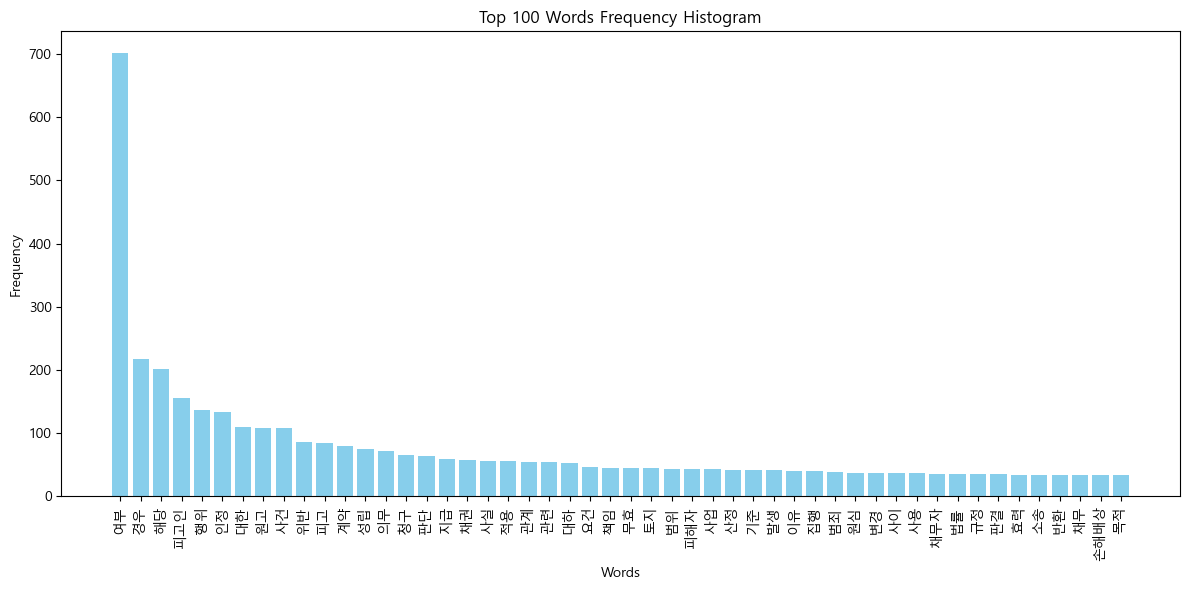

In [116]:
import matplotlib.pyplot as plt

# 상위 100개의 단어와 그 빈도수를 가져오기
top_words = word_counter2.most_common(50)

# 단어와 빈도를 각각 리스트로 분리
words, frequencies = zip(*top_words)

# 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xticks(rotation=90)  # x축의 단어들이 잘 보이도록 회전
plt.title('Top 100 Words Frequency Histogram')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

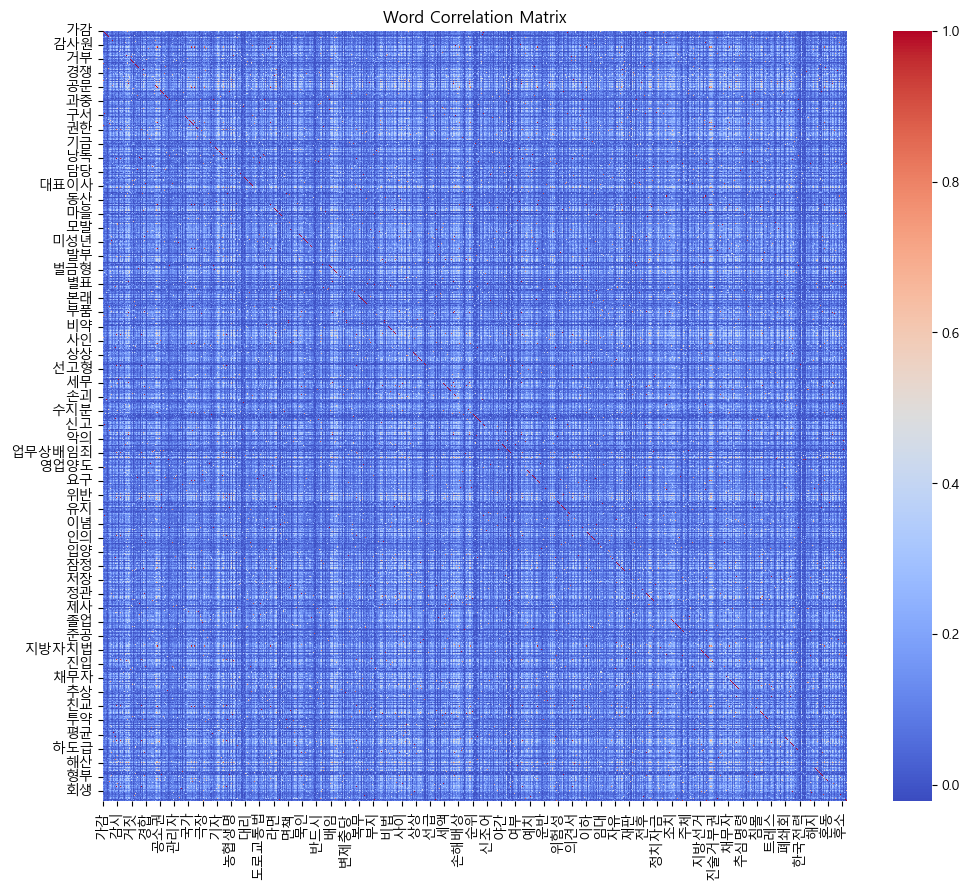

In [117]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# 텍스트 데이터에서 명사 추출
df1['쟁점_명사'] = df1['쟁   점'].fillna('').apply(extract_nouns)

# CountVectorizer를 사용하여 공출현 행렬 생성
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df1['쟁점_명사'])

# 단어 목록 추출
terms = vectorizer.get_feature_names_out()

# 공출현 행렬을 DataFrame으로 변환
co_occurrence_matrix = pd.DataFrame((X.T * X).toarray(), index=terms, columns=terms)

# 상관관계 행렬 계산 (피어슨 상관계수)
correlation_matrix = co_occurrence_matrix.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Word Correlation Matrix')
plt.show()

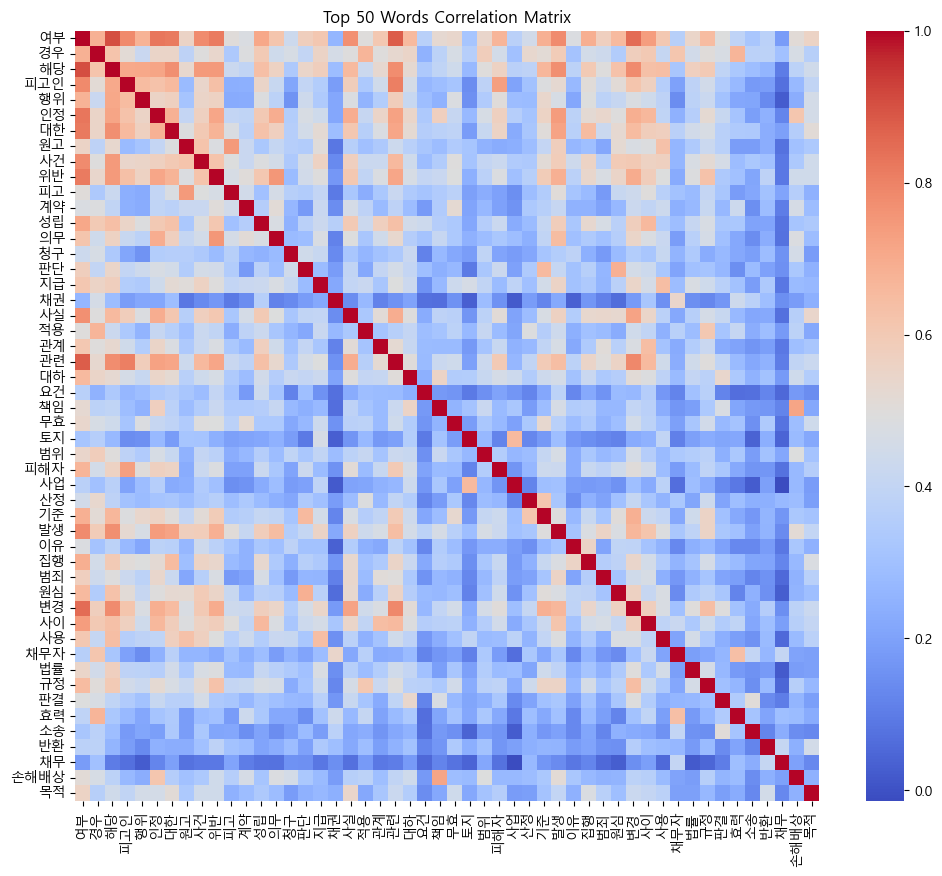

In [118]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# 1자 단어 제외 후 텍스트 데이터에서 명사 추출
df1['쟁점_명사'] = df1['쟁   점'].fillna('').apply(extract_nouns)

# 명사 빈도 분석
word_counter2 = Counter(' '.join(df1['쟁점_명사']).split())

# 상위 50개 단어 추출
top_50_words = [word for word, count in word_counter2.most_common(50)]

# 공출현 행렬 생성 (상위 50개 단어에 대해서만)
vectorizer = CountVectorizer(vocabulary=top_50_words)
X = vectorizer.fit_transform(df1['쟁점_명사'])

# 단어 목록 추출
terms = vectorizer.get_feature_names_out()

# 공출현 행렬을 DataFrame으로 변환
co_occurrence_matrix = pd.DataFrame((X.T * X).toarray(), index=terms, columns=terms)

# 상관관계 행렬 계산 (피어슨 상관계수)
correlation_matrix = co_occurrence_matrix.corr()

# 50개 단어에 대한 상관관계 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', xticklabels=terms, yticklabels=terms)
plt.title('Top 50 Words Correlation Matrix')
plt.show()


In [128]:
# 상관관계 행렬을 1차원으로 변환하고, 자기 자신(대각선)을 제외한 항목 중 상위 20개 선택
corr_unstacked = correlation_matrix.unstack().reset_index()
corr_unstacked.columns = ['Word1', 'Word2', 'Correlation']

# 자기 자신과의 상관관계를 제외하고 절대값 기준 상위 20개 추출
high_corr_pairs = corr_unstacked[corr_unstacked['Word1'] != corr_unstacked['Word2']] \
                            .sort_values(by='Correlation', ascending=False).drop_duplicates()[:100]

# 상위 100개 상관관계 높은 단어 쌍 출력
print(high_corr_pairs)

     Word1 Word2  Correlation
2       여부    해당     0.905332
100     해당    여부     0.905332
1050    관련    여부     0.877342
21      여부    관련     0.877342
37      여부    변경     0.848972
...    ...   ...          ...
309     대한    위반     0.671704
69      경우    적용     0.669801
951     적용    경우     0.669801
28      여부   피해자     0.669329
1400   피해자    여부     0.669329

[100 rows x 3 columns]


In [122]:
! pip install networkx

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 656.4 kB/s eta 0:00:03
   -------------------------- ------------- 1.1/1.7 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 10.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


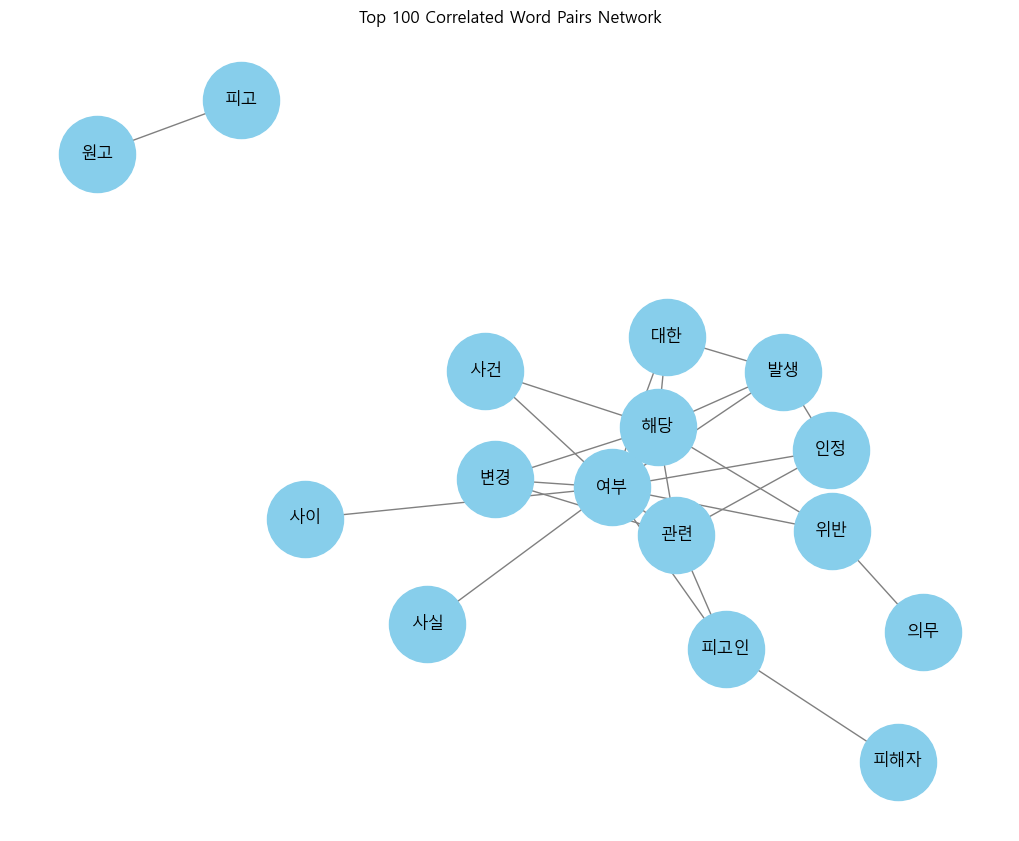

In [134]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
fontprop = fm.FontProperties(fname=font_path, size=12)

# 네트워크 그래프 객체 생성
G = nx.Graph()

# 상관관계가 높은 단어 쌍을 엣지로 추가
for _, row in high_corr_pairs.iterrows():
    G.add_edge(row['Word1'], row['Word2'], weight=row['Correlation'])

# 네트워크 그래프 그리기
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')

# 한글 폰트 적용
for label in plt.gca().texts:
    label.set_fontproperties(fontprop)

plt.title("Top 100 Correlated Word Pairs Network", fontproperties=fontprop)
plt.show()


In [135]:
# 상관관계 행렬을 1차원으로 변환하고, 자기 자신(대각선)을 제외한 항목 중 상위 20개 선택
corr_unstacked = correlation_matrix.unstack().reset_index()
corr_unstacked.columns = ['Word1', 'Word2', 'Correlation']

# 자기 자신과의 상관관계를 제외하고 절대값 기준 상위 20개 추출
high_corr_pairs = corr_unstacked[corr_unstacked['Word1'] != corr_unstacked['Word2']] \
                            .sort_values(by='Correlation', ascending=False).drop_duplicates()[:50]

# 상위 20개 상관관계 높은 단어 쌍 출력
print(high_corr_pairs)

     Word1 Word2  Correlation
2       여부    해당     0.905332
100     해당    여부     0.905332
1050    관련    여부     0.877342
21      여부    관련     0.877342
37      여부    변경     0.848972
1850    변경    여부     0.848972
5       여부    인정     0.825967
250     인정    여부     0.825967
300     대한    여부     0.820147
6       여부    대한     0.820147
9       여부    위반     0.815299
450     위반    여부     0.815299
1053    관련   피고인     0.807442
171    피고인    관련     0.807442
1871    변경    관련     0.788221
1087    관련    변경     0.788221
3       여부   피고인     0.782605
150    피고인    여부     0.782605
400     사건    여부     0.780168
8       여부    사건     0.780168
32      여부    발생     0.779588
1600    발생    여부     0.779588
1852    변경    해당     0.779542
137     해당    변경     0.779542
121     해당    관련     0.777894
1052    관련    해당     0.777894
132     해당    발생     0.772624
1602    발생    해당     0.772624
302     대한    해당     0.772341
106     해당    대한     0.772341
900     사실    여부     0.769479
18      여부    사실     0.769479
659     의무

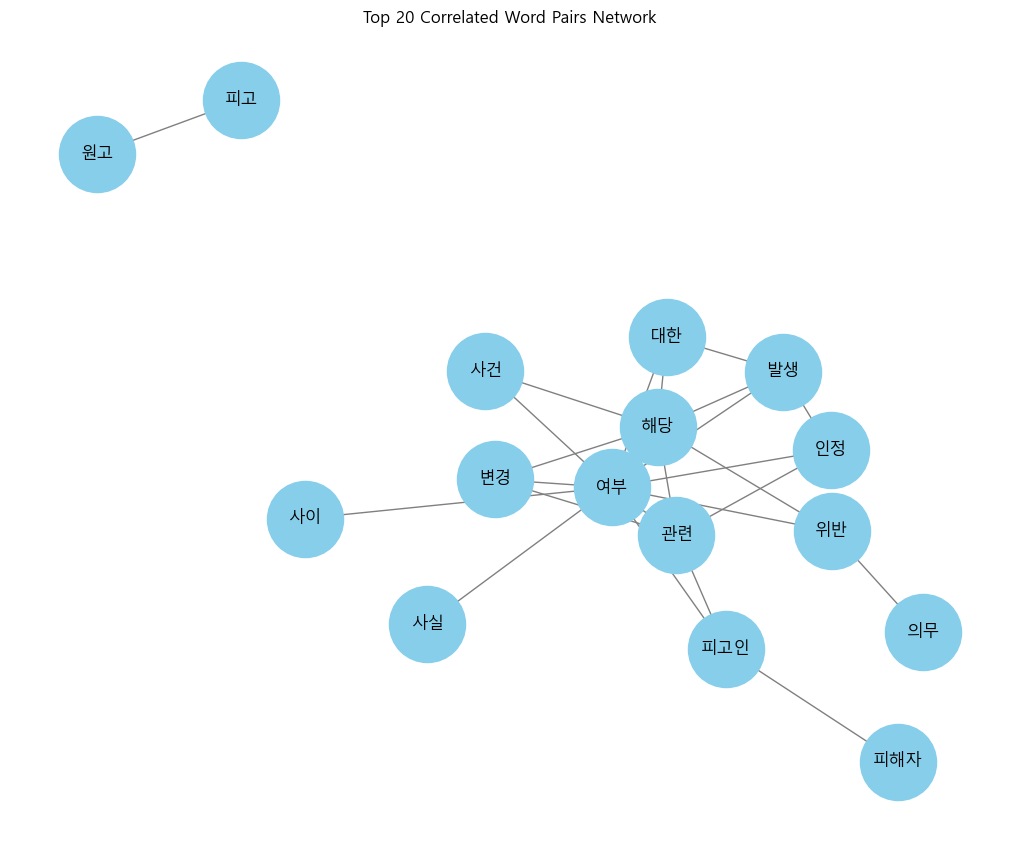

In [136]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
fontprop = fm.FontProperties(fname=font_path, size=12)

# 네트워크 그래프 객체 생성
G = nx.Graph()

# 상관관계가 높은 단어 쌍을 엣지로 추가
for _, row in high_corr_pairs.iterrows():
    G.add_edge(row['Word1'], row['Word2'], weight=row['Correlation'])

# 네트워크 그래프 그리기
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')

# 한글 폰트 적용
for label in plt.gca().texts:
    label.set_fontproperties(fontprop)

plt.title("Top 20 Correlated Word Pairs Network", fontproperties=fontprop)
plt.show()


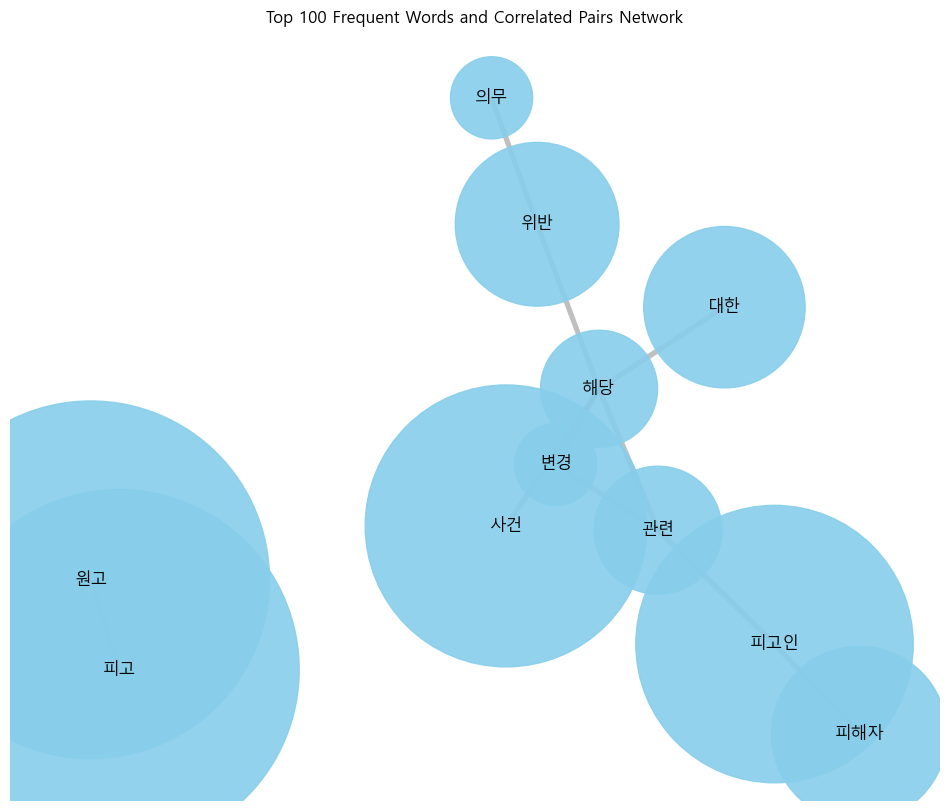

In [133]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx
import pandas as pd
from collections import Counter

# 한글 폰트 설정 (Windows 기준)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
fontprop = fm.FontProperties(fname=font_path, size=12)

# 빈도 상위 100개 단어만 추출
top_100_words = dict(Counter(word_counter).most_common(100))

# 네트워크 그래프 객체 생성
G = nx.Graph()

# 상관관계 높은 단어 쌍 (빈도 상위 100개만 포함) 엣지 추가
for _, row in high_corr_pairs.iterrows():
    if row['Word1'] in top_100_words and row['Word2'] in top_100_words:
        G.add_edge(row['Word1'], row['Word2'], weight=row['Correlation'])

# 노드 크기는 빈도수에 비례하도록 설정 (노드 크기 100배로 확장)
node_size = [top_100_words[word] * 100 for word in G.nodes()]

# 엣지 굵기는 상관관계 값(weight)에 비례하도록 설정
edge_width = [G[u][v]['weight'] * 5 for u, v in G.edges()]

# 네트워크 그래프 그리기
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)  # 노드 배치

# 노드와 엣지 그리기
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='skyblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, width=edge_width, edge_color='gray', alpha=0.5)

# 라벨(단어) 그리기
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_weight='bold')

# 한글 폰트 적용 (텍스트 수동 설정)
ax = plt.gca()
for text in ax.texts:
    text.set_fontproperties(fontprop)

plt.title("Top 100 Frequent Words and Correlated Pairs Network", fontproperties=fontprop)
plt.axis('off')  # 축 숨기기
plt.show()
